In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

In [12]:
output_path = "/home/maria/Downloads/scotus_embeddings.npy"

embeddings = np.load(output_path)

pca=PCA(n_components=100)
pca_result = pca.fit_transform(embeddings)

print(pca_result.shape)

(35781, 100)


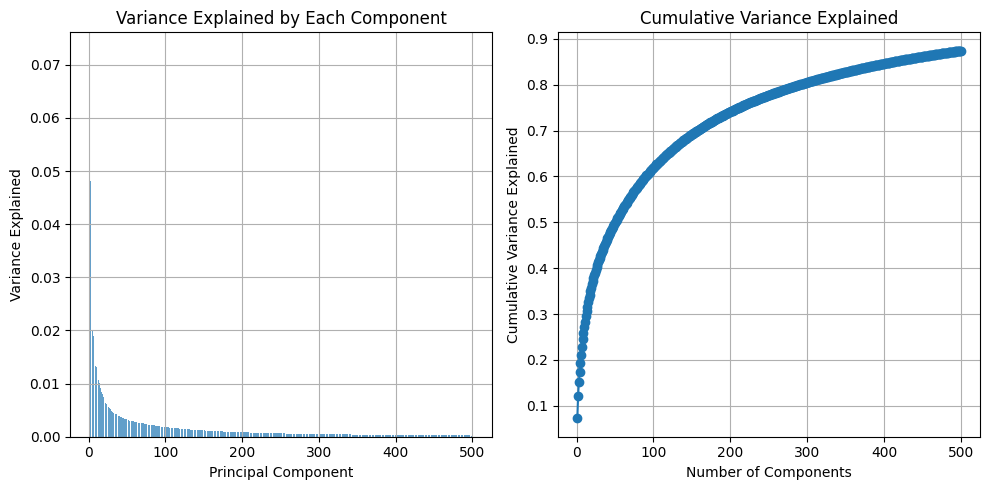

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load embeddings
output_path = "/home/maria/Downloads/scotus_embeddings.npy"
embeddings = np.load(output_path)

# Apply PCA
pca = PCA(n_components=500)
pca_result = pca.fit_transform(embeddings)

# Get explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot explained variance and cumulative variance
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.bar(range(1, 501), explained_variance, alpha=0.7, label="Explained Variance")
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")
plt.title("Variance Explained by Each Component")
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(range(1, 501), cumulative_variance, marker="o", linestyle="-", label="Cumulative Variance")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance Explained")
plt.title("Cumulative Variance Explained")
plt.grid()

plt.tight_layout()
plt.show()


In [8]:
pca_result_ = pca_result[:3000]

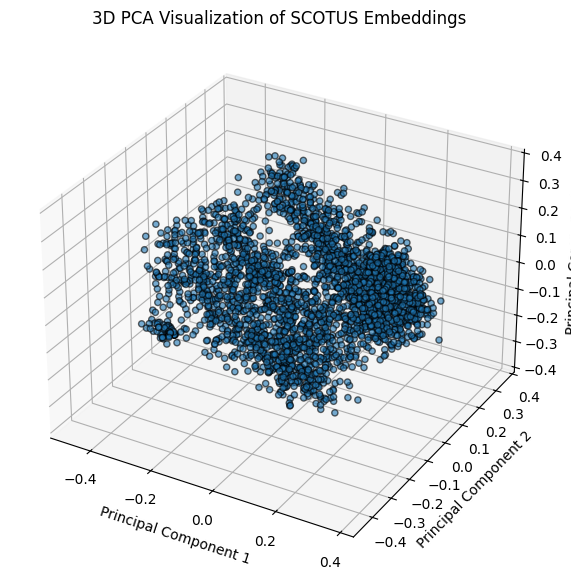

In [9]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_result_[:, 0], pca_result_[:, 1], pca_result_[:, 2], alpha=0.6, edgecolors='k')

# Labels and title
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.set_title("3D PCA Visualization of SCOTUS Embeddings")

plt.show()

In [10]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(embeddings)

/home/maria/Neurogarage2/.venv/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 35781 samples in 0.101s...
[t-SNE] Computed neighbors for 35781 samples in 55.553s...
[t-SNE] Computed conditional probabilities for sample 1000 / 35781
[t-SNE] Computed conditional probabilities for sample 2000 / 35781
[t-SNE] Computed conditional probabilities for sample 3000 / 35781
[t-SNE] Computed conditional probabilities for sample 4000 / 35781
[t-SNE] Computed conditional probabilities for sample 5000 / 35781
[t-SNE] Computed conditional probabilities for sample 6000 / 35781
[t-SNE] Computed conditional probabilities for sample 7000 / 35781
[t-SNE] Computed conditional probabilities for sample 8000 / 35781
[t-SNE] Computed conditional probabilities for sample 9000 / 35781
[t-SNE] Computed conditional probabilities for sample 10000 / 35781
[t-SNE] Computed conditional probabilities for sample 11000 / 35781
[t-SNE] Computed conditional probabilities for sample 12000 / 35781
[t-SNE] Computed conditional probabilities for s

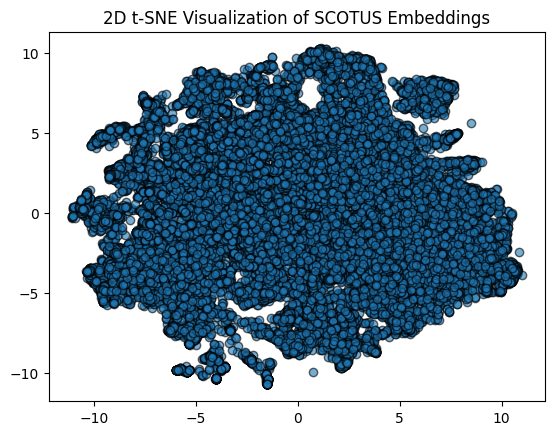

In [11]:
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], alpha=0.6, edgecolors='k')
plt.title("2D t-SNE Visualization of SCOTUS Embeddings")
plt.show()

In [14]:
import pandas as pd
data_path = "/home/maria/Neurogarage2/scotusCebra/scotus_with_summaries.csv"
df = pd.read_csv(data_path)
df.head()

,author_name,category,per_curiam,case_name,date_filed,federal_cite_one,absolute_url,cluster,year_filed,scdb_id,scdb_decision_direction,scdb_votes_majority,scdb_votes_minority,text,summary
0,Justice Roberts,majority,False,McCutcheon v. Federal Election Comm'n,2014-04-02,NaN,https://www.courtlistener.com/opinion/2659301/...,https://www.courtlistener.com/api/rest/v3/clus...,2014,2013-033,1.0,5.0,4.0,There is no right more basic in our democracy ...,1867). In the context of base contribution lim...
1,Justice Thomas,concurring,False,McCutcheon v. Federal Election Comm'n,2014-04-02,NaN,https://www.courtlistener.com/opinion/2659301/...,https://www.courtlistener.com/api/rest/v3/clus...,2014,2013-033,1.0,5.0,4.0,I adhere to the view that this Court’s decisio...,I adhere to the view that this Court’s decisio...
2,Justice Breyer,dissenting,False,McCutcheon v. Federal Election Comm'n,2014-04-02,NaN,https://www.courtlistener.com/opinion/2659301/...,https://www.courtlistener.com/api/rest/v3/clus...,2014,2013-033,1.0,5.0,4.0,"Nearly 40 years ago in Buckley v. Valeo, 424 U...","D\n One case, however, contains language tha..."
3,Justice Taney,majority,False,Ex Parte Crenshaw,1841-02-18,40 U.S. 119,https://www.courtlistener.com/opinion/86166/ex...,https://www.courtlistener.com/api/rest/v3/clus...,1841,1841-005,2.0,9.0,0.0,This case was brought here by an appeal from t...,This case was brought here by an appeal from t...
4,Justice Pitney,majority,False,Richards v. Washington Terminal Co.,1914-05-04,233 U.S. 546,https://www.courtlistener.com/opinion/98178/ri...,https://www.courtlistener.com/api/rest/v3/clus...,1914,1913-149,1.0,8.0,1.0,"Plaintiff in error, who was plaintiff below, c...",679; 29 L.J. This grant of the power of condem...


In [15]:
# Sort data by date_filed
df = df.sort_values(by='date_filed').reset_index(drop=True)
embeddings = pca_result[df.index]  # Sort embeddings in the same order

In [16]:
embeddings.shape

(35781, 100)

In [17]:
np.save('embs.npy', embeddings)